In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 199MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize

def process(image,labels):
  image=tf.cast(image/255,tf.float32)
  return image,labels

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
# Create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 93ms/step - loss: 0.6349 - accuracy: 0.6432 - val_loss: 0.5000 - val_accuracy: 0.7600
Epoch 2/10
625/625 [==============================] - 57s 90ms/step - loss: 0.4745 - accuracy: 0.7679 - val_loss: 0.5404 - val_accuracy: 0.7502
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3580 - accuracy: 0.8382 - val_loss: 0.6227 - val_accuracy: 0.7850
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2193 - accuracy: 0.9071 - val_loss: 0.6591 - val_accuracy: 0.7802
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1173 - accuracy: 0.9543 - val_loss: 0.9390 - val_accuracy: 0.7818
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0690 - accuracy: 0.9763 - val_loss: 1.1142 - val_accuracy: 0.7774
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0537 - accuracy: 0.9820 - val_loss: 1.2093 - val_accuracy:

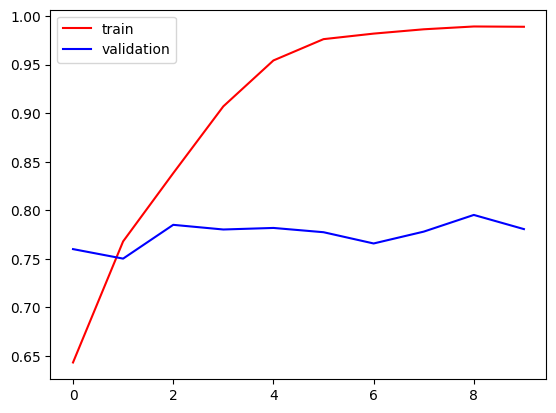

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

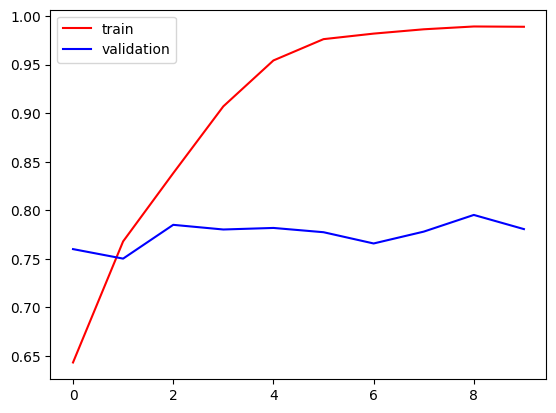

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

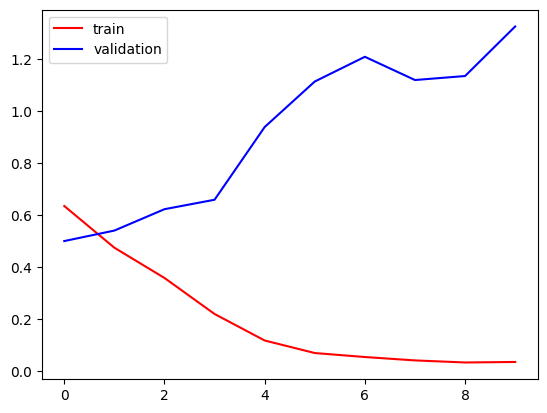

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

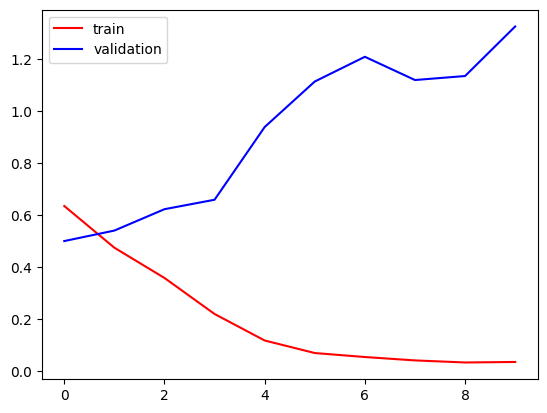

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.png')

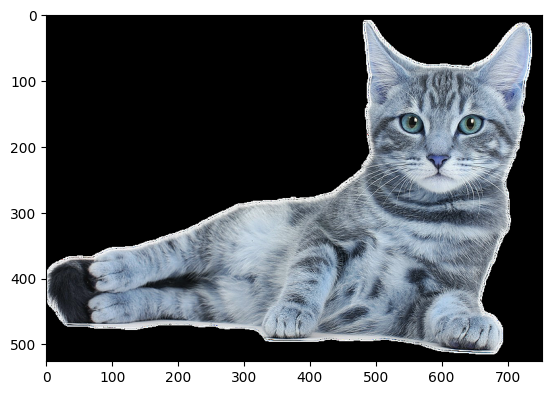

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(526, 753, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
# Dropout
# Batch Norm

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 101ms/step - loss: 1.5932 - accuracy: 0.5627 - val_loss: 0.6775 - val_accuracy: 0.5904
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6391 - accuracy: 0.6578 - val_loss: 0.6938 - val_accuracy: 0.6016
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5590 - accuracy: 0.7139 - val_loss: 0.5227 - val_accuracy: 0.7450
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4999 - accuracy: 0.7600 - val_loss: 0.4889 - val_accuracy: 0.7622
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4387 - accuracy: 0.7966 - val_loss: 0.4760 - val_accuracy: 0.7684
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3917 - accuracy: 0.8198 - val_loss: 0.4337 - val_accuracy: 0.7970
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3406 - accuracy: 0.8469 - val_loss: 0.4894 - val_ac

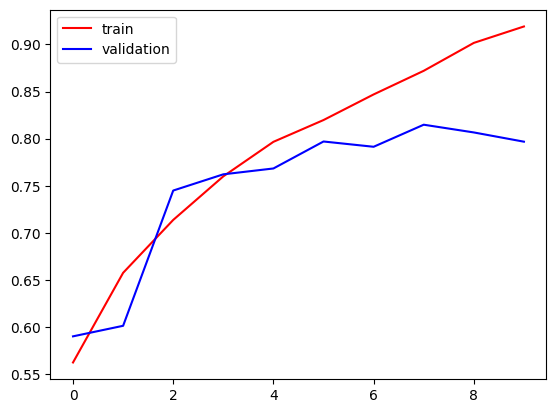

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

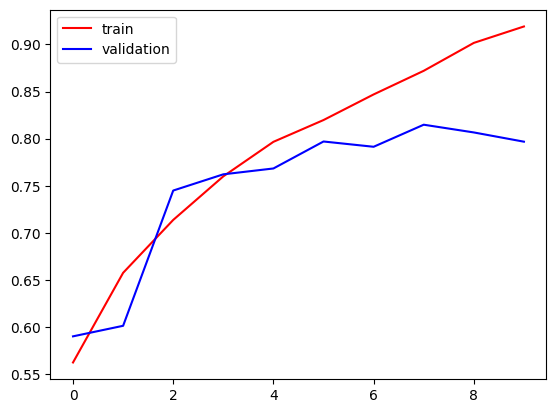

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

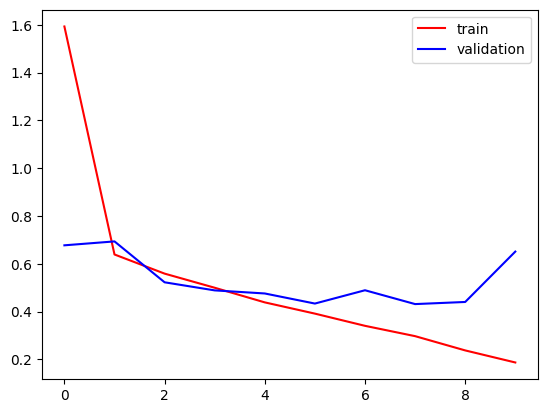

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

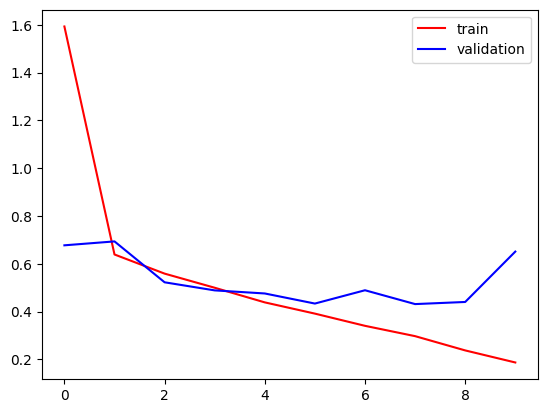

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()